In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#pip install pandas_ta

In [3]:
import pandas_ta as ta

In [4]:
import random
import os
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [5]:
bist_daily = pd.read_csv("datasets/bist_100_daily.csv")
# Extract the number of rows and columns by using the shape of the data.
numRows,numColumns = bist_daily.shape
# Extract the time interval.
last_date, first_date = bist_daily.iloc[0].Date, bist_daily.iloc[-1].Date
# Check the availability of the data.
na_cols = bist_daily.columns[bist_daily.isna().any()].tolist()

# Print the information.
print(f"There are {numRows} rows and {numColumns} columns in the initial dataset.")
print(f"The data represents the time frame between the dates '{last_date}' and '{first_date}'.")
if not na_cols:
    print("There are no NA rows.")
else:
    print(f"Columns in the dataset which include NA rows: {na_cols}.")
# Convert columns to numeric values
column_names = ["Price", "Open", "High", "Low"]
for column in column_names:
    bist_daily[column] = bist_daily[column].str.replace(',', '')
    bist_daily[column] = pd.to_numeric(bist_daily[column])
# CONVERT TO DATETIME FORMAT AND SORT DATA BY DATE
bist_daily.Date = pd.to_datetime(bist_daily.Date)
bist_daily.sort_values(by="Date", ignore_index=True,inplace=True)
bist_daily.set_index(pd.DatetimeIndex(bist_daily["Date"]), inplace=True)
bist_daily.rename(columns={"Price": "close"},inplace=True)
# Calculate Returns and append to the df DataFrame
# CUMLOGRET_1 and CUMPCTRET_1 are added (NaN values exists)
bist_daily.ta.log_return(cumulative=True, append=True)
bist_daily.ta.percent_return(cumulative=True, append=True)
# Returns a list of indicators and utility functions (to check in future)
ind_list = bist_daily.ta.indicators(as_list=True)
# RSI_14, MACD_12_26_9, MACDh_12_26_9 and MACDs_12_26_9 are added (NaN values exists)
bist_daily.ta.rsi(append=True)
bist_daily.ta.macd(append=True)
# SMA values are added (use ta in the future)
sma_values = [5, 10, 15] 
for i in sma_values:
    bist_daily['SMA'+str(i)] = bist_daily['close'].rolling(window=i).mean()
# Remove all NaN value rows
bist_daily.dropna(inplace=True)
bist_daily

There are 5000 rows and 7 columns in the initial dataset.
The data represents the time frame between the dates 'Dec 11, 2019' and 'Jan 04, 2000'.
There are no NA rows.


,date,close,open,high,low,Vol.,Change %,CUMLOGRET_1,CUMPCTRET_1,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,SMA5,SMA10,SMA15
date,,,,,,,,,,,,,,,,
2000-02-21,2000-02-21,145.69,153.64,153.64,142.79,25.75M,-5.17%,-0.183990,-0.160515,34.352566,-7.230371,-0.392050,-6.838321,153.936,155.116,157.896000
2000-02-22,2000-02-22,139.94,145.69,147.02,137.58,29.58M,-3.95%,-0.224258,-0.199983,31.136786,-8.027940,-0.951695,-7.076245,150.206,153.060,156.330667
2000-02-23,2000-02-23,134.47,139.94,141.26,131.71,26.95M,-3.91%,-0.264130,-0.239071,28.411996,-8.997682,-1.537150,-7.460532,145.432,151.074,154.602000
2000-02-24,2000-02-24,146.52,134.47,146.52,134.14,43.02M,8.96%,-0.178310,-0.149460,40.719161,-8.693661,-0.986503,-7.707158,144.052,149.896,153.638667
2000-02-25,2000-02-25,156.18,146.52,156.32,146.52,56.16M,6.59%,-0.114462,-0.083530,48.380526,-7.585796,0.097090,-7.682886,144.560,149.916,152.803333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-05,2019-12-05,1086.59,1082.60,1090.32,1081.51,2.24B,0.89%,1.825328,2.894902,66.153619,16.788401,0.360019,16.428382,1076.116,1068.981,1068.217333
2019-12-06,2019-12-06,1088.69,1090.09,1093.15,1083.52,2.16B,0.19%,1.827259,2.896834,66.774984,17.187282,0.607120,16.580162,1080.046,1071.262,1070.543333
2019-12-09,2019-12-09,1087.86,1088.96,1091.25,1081.39,2.32B,-0.08%,1.826496,2.896072,66.257244,17.237719,0.526046,16.711673,1081.610,1074.666,1071.836667


In [6]:
# edit Vol. column

from operator import itemgetter

vols = bist_daily['Vol.'].to_list()
#[vol[-1] for vol in vols]
#list(filter(lambda vol: "-" in vol,enumerate(vols)))

indexToRemove = bist_daily.iloc[list(map(itemgetter(0),filter(lambda vol: "-" in vol,enumerate(vols))))].index
bist_daily.drop(indexToRemove,inplace=True)
bist_daily['Vol.'] = bist_daily['Vol.'].apply(
    lambda x: float(x[:-1])*(10**6) if x[-1]=="M" else (float(x[:-1])*(10**9) if x[-1]=="B" else "ERROR")).astype("int")
bist_daily

,date,close,open,high,low,Vol.,Change %,CUMLOGRET_1,CUMPCTRET_1,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,SMA5,SMA10,SMA15
date,,,,,,,,,,,,,,,,
2000-02-21,2000-02-21,145.69,153.64,153.64,142.79,25750000,-5.17%,-0.183990,-0.160515,34.352566,-7.230371,-0.392050,-6.838321,153.936,155.116,157.896000
2000-02-22,2000-02-22,139.94,145.69,147.02,137.58,29580000,-3.95%,-0.224258,-0.199983,31.136786,-8.027940,-0.951695,-7.076245,150.206,153.060,156.330667
2000-02-23,2000-02-23,134.47,139.94,141.26,131.71,26950000,-3.91%,-0.264130,-0.239071,28.411996,-8.997682,-1.537150,-7.460532,145.432,151.074,154.602000
2000-02-24,2000-02-24,146.52,134.47,146.52,134.14,43020000,8.96%,-0.178310,-0.149460,40.719161,-8.693661,-0.986503,-7.707158,144.052,149.896,153.638667
2000-02-25,2000-02-25,156.18,146.52,156.32,146.52,56160000,6.59%,-0.114462,-0.083530,48.380526,-7.585796,0.097090,-7.682886,144.560,149.916,152.803333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-05,2019-12-05,1086.59,1082.60,1090.32,1081.51,2240000000,0.89%,1.825328,2.894902,66.153619,16.788401,0.360019,16.428382,1076.116,1068.981,1068.217333
2019-12-06,2019-12-06,1088.69,1090.09,1093.15,1083.52,2160000000,0.19%,1.827259,2.896834,66.774984,17.187282,0.607120,16.580162,1080.046,1071.262,1070.543333
2019-12-09,2019-12-09,1087.86,1088.96,1091.25,1081.39,2320000000,-0.08%,1.826496,2.896072,66.257244,17.237719,0.526046,16.711673,1081.610,1074.666,1071.836667


In [7]:
# seeding an arbitrary number to get same results in multiple runs
manualSeed = 999
random.seed(manualSeed)
torch.manual_seed(manualSeed)
print("Seed:", manualSeed)

Seed: 999


In [8]:
# getting number of GPUs from cuda
ngpu = torch.cuda.device_count()
print("Count of available GPUs:", ngpu)

Count of available GPUs: 1


In [9]:
# printing the name of available GPUs
for i in range(ngpu):
    print("GPU {}: {}".format(i+1, torch.cuda.get_device_name(i)))

GPU 1: GeForce MX150


In [10]:
# batch size for the training
batch_size = 64

# optimizer rates
optimizer_betas = (0.9, 0.999)
learning_rate = 5e-4

# number of epochs
num_epochs = 100000

# decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

In [11]:
class TimeseriesDataset(Dataset):
    def __init__(self, data_frame, sequence_length=2):
        self.data = torch.tensor(data_frame.values)
        self.sequence_length = sequence_length

    def __len__(self):
        return self.data.shape[0] - self.sequence_length + 1

    def __getitem__(self, index):
        return self.data[index: index + self.sequence_length].float()
    
    # Non-overlapping series
    # def __getitem__(self, index):
    #     return self.data[index * self.sequence_length: (index+1) * self.sequence_length]

In [12]:
# create pytorch dataset from the pandas DataFrame

# TODO: Convert change(%) and Volume columns to numeric values
columns_used_in_training = ["close", "open", "high", "low", "CUMLOGRET_1", "RSI_14", "MACD_12_26_9", "SMA5"]
# input dimension of the generator
data_dimension = len(columns_used_in_training)
# sequence length of input data
sequence_length = 7

train_data, rest_data = train_test_split(bist_daily[columns_used_in_training], test_size=0.2, shuffle=False)

scaler = MinMaxScaler()
scaler.fit(train_data)
train_data[train_data.columns] = scaler.transform(train_data)
rest_data[rest_data.columns] = scaler.transform(rest_data)

validation_data, test_data = train_test_split(rest_data, test_size=0.5, shuffle=False)

train_dataset = TimeseriesDataset(train_data, sequence_length)
test_dataset = TimeseriesDataset(test_data, sequence_length)
validation_dataset = TimeseriesDataset(validation_data, sequence_length)

# create the dataloader
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)
validation_dataloader = torch.utils.data.DataLoader(validation_dataset, batch_size=batch_size)
real_data_sample = next(iter(train_dataloader))
print("Real data sample shape:", real_data_sample.shape)

Real data sample shape: torch.Size([64, 7, 8])


In [13]:
class Generator(nn.Module):
    def __init__(self, hidden_size):
        super(Generator, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size=data_dimension, hidden_size=hidden_size, num_layers=1, dropout=0.2, batch_first=True)
        self.linear = nn.Linear(hidden_size, data_dimension)
        self.drop = nn.Dropout(0.2)

    def forward(self, input_sequences):
        input_sequences = self.drop(input_sequences)
        lstm_output, hidden_cell = self.lstm(input_sequences)
        res = self.linear(hidden_cell[0][-1])
        res = res.view(res.shape[0], 1, -1)
        return res

In [14]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(sequence_length*data_dimension, 16),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.2),
            nn.Linear(16, 8),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.2),
            nn.Linear(8, 1),
            nn.Sigmoid(),
        )

    def forward(self, input_sequences):
        input_sequences_flattened = input_sequences.view(input_sequences.shape[0], -1)
        res = self.model(input_sequences_flattened)
        return res

In [15]:
def model_rmse(model, dataloader, plot_graph=False, plot_title="Validation Predictions"):
    rmse = 0
    squared_error_list = []
    real_data_list = []
    predicted_data_list = []
    for i, sequence_batch in enumerate(dataloader):
        with torch.no_grad():
            real_sequence = sequence_batch
            # Assign first t values
            generator_input_sequence = sequence_batch[:,:-1].to(device)
            real_values = sequence_batch[:,-1:]
            #  Generate (t+1)th value from first t values
            predicted_values = generator(generator_input_sequence).cpu()
            real_data_list.append(real_values)
            predicted_data_list.append(predicted_values)
    
    real_data = torch.cat(real_data_list, 0)
    predicted_data = torch.cat(predicted_data_list, 0)
    
    # Unscale data
    df_pred = pd.DataFrame(predicted_data.view(-1,len(columns_used_in_training)),columns=columns_used_in_training)
    df_pred_unscaled = pd.DataFrame(scaler.inverse_transform(df_pred),columns=columns_used_in_training)
    df_real = pd.DataFrame(real_data.view(-1,len(columns_used_in_training)),columns=columns_used_in_training)
    df_real_unscaled = pd.DataFrame(scaler.inverse_transform(df_real),columns=columns_used_in_training)
    
    if plot_graph:
        # TODO: get x values and plot prediction of multiple columns
        plt.xlabel("Date")
        plt.ylabel("Close Price")
        plt.title(plot_title)
        plt.plot(df_real_unscaled['close'],label="Real")
        plt.plot(df_pred_unscaled['close'],label="Predicted")
        plt.ylim(bottom=0)
        plt.legend()
        plt.show()
        
    squared_errors = (df_real_unscaled['close'] - df_pred_unscaled['close'])**2
    rmse = np.sqrt(squared_errors.mean())
    return rmse

In [16]:
# TODO: weight initialization of models

In [17]:
generator = Generator(hidden_size=data_dimension*2).to(device)
discriminator = Discriminator().to(device)
print("Generator and discriminator are initialized")

/home/egemen/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Generator and discriminator are initialized


In [18]:
criterion = nn.BCELoss()
optimizer_generator = optim.Adam(generator.parameters(), lr=learning_rate, betas=optimizer_betas)
optimizer_discriminator = optim.Adam(discriminator.parameters(), lr=learning_rate, betas=optimizer_betas)

real_label = 1.
fake_label = 0.

In [19]:
if not os.path.exists('./models/'):
    os.makedirs('./models/')

Training is started


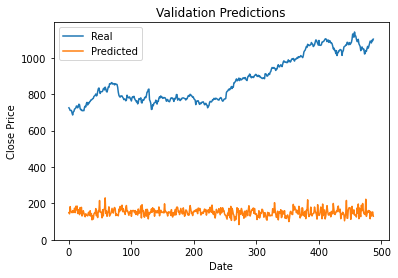


[1/100000]	Discriminator Loss: 1.3561	Generator Loss: 0.6839   	RMSE:740.1185
close | Real:0.0030 / Generated:0.1001
open | Real:0.0037 / Generated:-0.2430
high | Real:0.0000 / Generated:-0.2486
low | Real:0.0047 / Generated:0.0313
CUMLOGRET_1 | Real:0.0136 / Generated:-0.1949
RSI_14 | Real:0.2038 / Generated:0.0896
MACD_12_26_9 | Real:0.4882 / Generated:0.0972
SMA5 | Real:0.0000 / Generated:0.3337


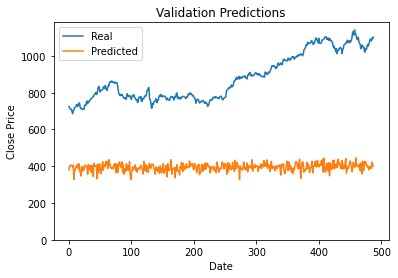


[5/100000]	Discriminator Loss: 1.3636	Generator Loss: 0.6660   	RMSE:500.3394
close | Real:0.6679 / Generated:0.3765
open | Real:0.6634 / Generated:0.0861
high | Real:0.6655 / Generated:0.3453
low | Real:0.6708 / Generated:0.4812
CUMLOGRET_1 | Real:0.8573 / Generated:1.0835
RSI_14 | Real:0.5876 / Generated:0.9559
MACD_12_26_9 | Real:0.7268 / Generated:1.0584
SMA5 | Real:0.6797 / Generated:-0.3166


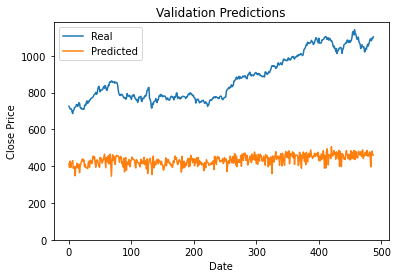


[10/100000]	Discriminator Loss: 1.3390	Generator Loss: 0.7441   	RMSE:459.2694
close | Real:0.1410 / Generated:0.2874
open | Real:0.1400 / Generated:0.7851
high | Real:0.1374 / Generated:0.3532
low | Real:0.1444 / Generated:0.2810
CUMLOGRET_1 | Real:0.3862 / Generated:0.0261
RSI_14 | Real:0.5729 / Generated:0.0508
MACD_12_26_9 | Real:0.6181 / Generated:0.1663
SMA5 | Real:0.1394 / Generated:0.5060


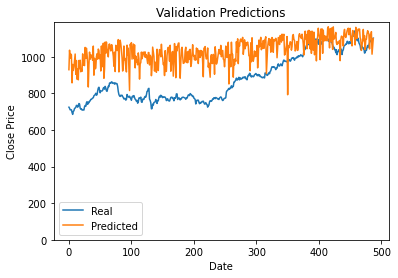


[15/100000]	Discriminator Loss: 1.3968	Generator Loss: 0.6939   	RMSE:181.4527
close | Real:0.6449 / Generated:0.9960
open | Real:0.6451 / Generated:0.4629
high | Real:0.6455 / Generated:1.2128
low | Real:0.6544 / Generated:0.0916
CUMLOGRET_1 | Real:0.8452 / Generated:1.0199
RSI_14 | Real:0.4424 / Generated:0.5933
MACD_12_26_9 | Real:0.5753 / Generated:1.0802
SMA5 | Real:0.6576 / Generated:0.4925


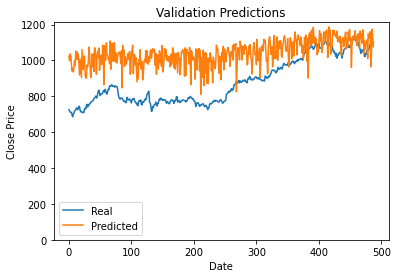


[20/100000]	Discriminator Loss: 1.4080	Generator Loss: 0.6322   	RMSE:188.3717
close | Real:0.7139 / Generated:0.8586
open | Real:0.7121 / Generated:1.3433
high | Real:0.7110 / Generated:0.8623
low | Real:0.7225 / Generated:0.6246
CUMLOGRET_1 | Real:0.8805 / Generated:0.7292
RSI_14 | Real:0.6367 / Generated:0.0855
MACD_12_26_9 | Real:0.7599 / Generated:0.7094
SMA5 | Real:0.7174 / Generated:0.4812


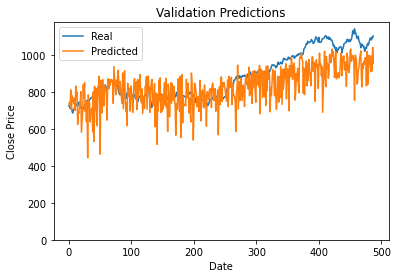


[25/100000]	Discriminator Loss: 1.4154	Generator Loss: 0.6615   	RMSE:109.1156
close | Real:0.4529 / Generated:0.4547
open | Real:0.4559 / Generated:0.5354
high | Real:0.4561 / Generated:0.3368
low | Real:0.4575 / Generated:0.3689
CUMLOGRET_1 | Real:0.7259 / Generated:0.5595
RSI_14 | Real:0.3244 / Generated:0.4752
MACD_12_26_9 | Real:0.5148 / Generated:0.2333
SMA5 | Real:0.4741 / Generated:0.6418


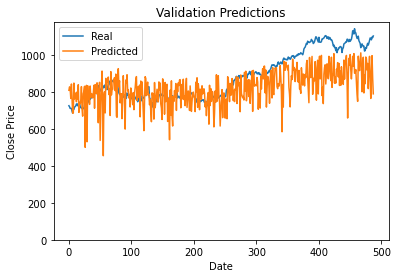


[30/100000]	Discriminator Loss: 1.3689	Generator Loss: 0.7138   	RMSE:119.2883
close | Real:0.8098 / Generated:0.9005
open | Real:0.8106 / Generated:0.6717
high | Real:0.8158 / Generated:0.8911
low | Real:0.8241 / Generated:0.4858
CUMLOGRET_1 | Real:0.9247 / Generated:0.8603
RSI_14 | Real:0.8454 / Generated:0.3929
MACD_12_26_9 | Real:0.8453 / Generated:0.9016
SMA5 | Real:0.8176 / Generated:0.7281


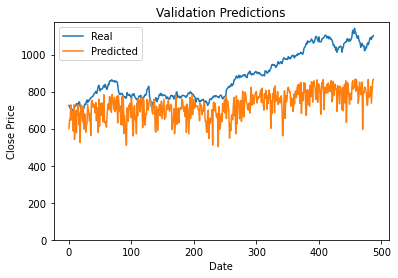


[35/100000]	Discriminator Loss: 1.3580	Generator Loss: 0.7666   	RMSE:180.8328
close | Real:0.7574 / Generated:0.7293
open | Real:0.7633 / Generated:0.7825
high | Real:0.7640 / Generated:0.5700
low | Real:0.7718 / Generated:0.5763
CUMLOGRET_1 | Real:0.9012 / Generated:0.9193
RSI_14 | Real:0.5882 / Generated:0.4013
MACD_12_26_9 | Real:0.8091 / Generated:0.7268
SMA5 | Real:0.7702 / Generated:0.8524


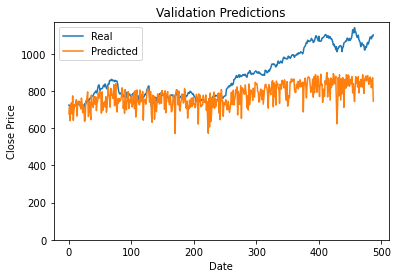


[40/100000]	Discriminator Loss: 1.3709	Generator Loss: 0.7002   	RMSE:141.3257
close | Real:0.5647 / Generated:0.6010
open | Real:0.5738 / Generated:0.5509
high | Real:0.5725 / Generated:0.7101
low | Real:0.5749 / Generated:0.7515
CUMLOGRET_1 | Real:0.7997 / Generated:0.8202
RSI_14 | Real:0.2247 / Generated:0.7384
MACD_12_26_9 | Real:0.4220 / Generated:0.7622
SMA5 | Real:0.5849 / Generated:0.5424


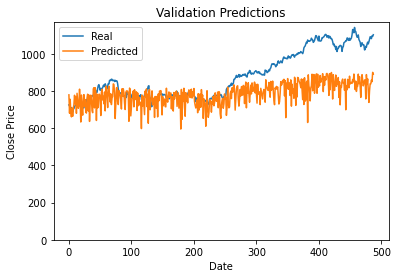


[45/100000]	Discriminator Loss: 1.3464	Generator Loss: 0.7691   	RMSE:139.5156
close | Real:0.8048 / Generated:0.7908
open | Real:0.8116 / Generated:0.9140
high | Real:0.8191 / Generated:0.5738
low | Real:0.8151 / Generated:0.8169
CUMLOGRET_1 | Real:0.9226 / Generated:1.1340
RSI_14 | Real:0.2537 / Generated:0.4586
MACD_12_26_9 | Real:0.1305 / Generated:0.5810
SMA5 | Real:0.8399 / Generated:0.8941


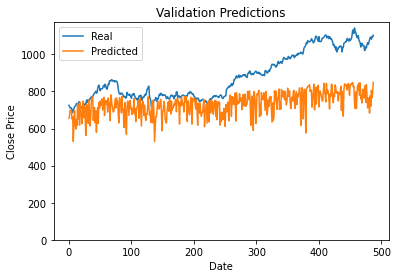


[50/100000]	Discriminator Loss: 1.3436	Generator Loss: 0.7343   	RMSE:178.0322
close | Real:0.0266 / Generated:0.0399
open | Real:0.0222 / Generated:0.0328
high | Real:0.0235 / Generated:0.0424
low | Real:0.0268 / Generated:0.0581
CUMLOGRET_1 | Real:0.1081 / Generated:0.1459
RSI_14 | Real:0.6225 / Generated:0.5433
MACD_12_26_9 | Real:0.6135 / Generated:0.6381
SMA5 | Real:0.0203 / Generated:0.0192


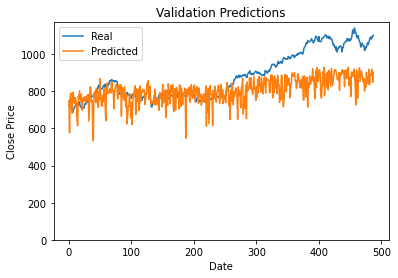


[55/100000]	Discriminator Loss: 1.3126	Generator Loss: 0.7372   	RMSE:124.2919
close | Real:0.1226 / Generated:0.1592
open | Real:0.1186 / Generated:0.1489
high | Real:0.1191 / Generated:0.1285
low | Real:0.1236 / Generated:0.0892
CUMLOGRET_1 | Real:0.3529 / Generated:0.2932
RSI_14 | Real:0.5864 / Generated:0.5384
MACD_12_26_9 | Real:0.5771 / Generated:0.6194
SMA5 | Real:0.1144 / Generated:0.1109


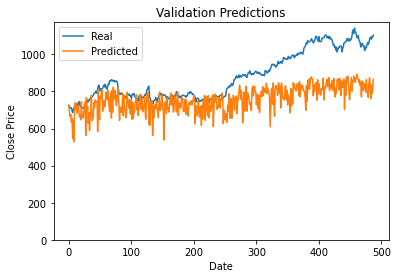


[60/100000]	Discriminator Loss: 1.3084	Generator Loss: 0.7173   	RMSE:152.4363
close | Real:0.5305 / Generated:0.5551
open | Real:0.5184 / Generated:0.4544
high | Real:0.5275 / Generated:0.4651
low | Real:0.5264 / Generated:0.4975
CUMLOGRET_1 | Real:0.7786 / Generated:0.7922
RSI_14 | Real:0.5428 / Generated:0.3504
MACD_12_26_9 | Real:0.5341 / Generated:0.5235
SMA5 | Real:0.5257 / Generated:0.5133


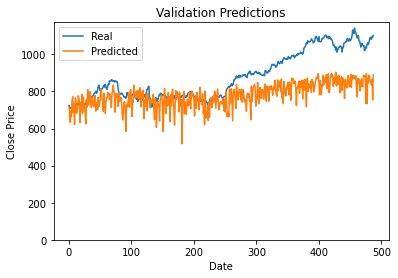


[65/100000]	Discriminator Loss: 1.2425	Generator Loss: 0.8812   	RMSE:136.7107
close | Real:0.3999 / Generated:0.4109
open | Real:0.4043 / Generated:0.4326
high | Real:0.4013 / Generated:0.4110
low | Real:0.4058 / Generated:0.4312
CUMLOGRET_1 | Real:0.6853 / Generated:0.5971
RSI_14 | Real:0.4691 / Generated:0.4615
MACD_12_26_9 | Real:0.5609 / Generated:0.5472
SMA5 | Real:0.4076 / Generated:0.3301


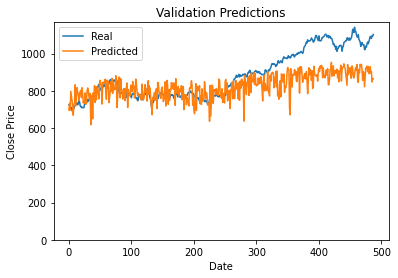


[70/100000]	Discriminator Loss: 1.2214	Generator Loss: 0.9071   	RMSE:106.3228
close | Real:0.2558 / Generated:0.2751
open | Real:0.2510 / Generated:0.2482
high | Real:0.2524 / Generated:0.2590
low | Real:0.2582 / Generated:0.3297
CUMLOGRET_1 | Real:0.5473 / Generated:0.6466
RSI_14 | Real:0.7446 / Generated:0.7813
MACD_12_26_9 | Real:0.6997 / Generated:0.8471
SMA5 | Real:0.2565 / Generated:0.2120


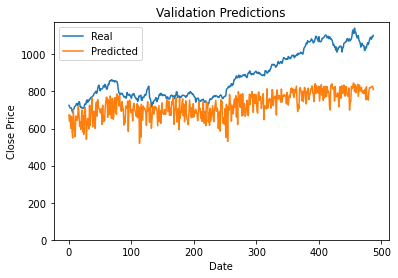


[75/100000]	Discriminator Loss: 1.3874	Generator Loss: 0.7281   	RMSE:175.7025
close | Real:0.4717 / Generated:0.4196
open | Real:0.4647 / Generated:0.4576
high | Real:0.4689 / Generated:0.4268
low | Real:0.4726 / Generated:0.4506
CUMLOGRET_1 | Real:0.7393 / Generated:0.7064
RSI_14 | Real:0.6636 / Generated:0.5677
MACD_12_26_9 | Real:0.6340 / Generated:0.5939
SMA5 | Real:0.4627 / Generated:0.3427


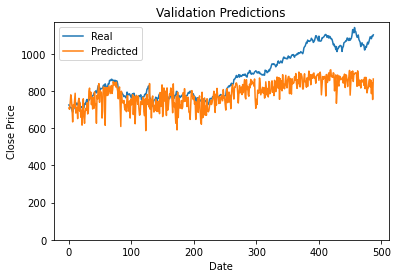


[80/100000]	Discriminator Loss: 1.1379	Generator Loss: 1.0334   	RMSE:125.1589
close | Real:0.0425 / Generated:0.0319
open | Real:0.0442 / Generated:0.0386
high | Real:0.0423 / Generated:0.0181
low | Real:0.0464 / Generated:0.0284
CUMLOGRET_1 | Real:0.1608 / Generated:0.1819
RSI_14 | Real:0.4472 / Generated:0.5169
MACD_12_26_9 | Real:0.5829 / Generated:0.6453
SMA5 | Real:0.0396 / Generated:0.0482


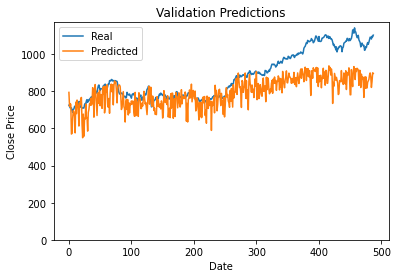


[85/100000]	Discriminator Loss: 1.0650	Generator Loss: 1.1558   	RMSE:117.7779
close | Real:0.0586 / Generated:0.0305
open | Real:0.0625 / Generated:0.0700
high | Real:0.0646 / Generated:0.0770
low | Real:0.0626 / Generated:0.0755
CUMLOGRET_1 | Real:0.2078 / Generated:0.2125
RSI_14 | Real:0.7399 / Generated:0.7785
MACD_12_26_9 | Real:0.7578 / Generated:0.8099
SMA5 | Real:0.0577 / Generated:0.0975


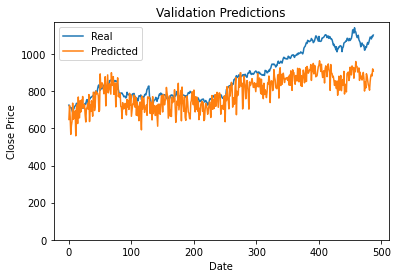


[90/100000]	Discriminator Loss: 1.0423	Generator Loss: 1.2031   	RMSE:113.1558
close | Real:0.0506 / Generated:0.0560
open | Real:0.0458 / Generated:0.0542
high | Real:0.0471 / Generated:0.0269
low | Real:0.0501 / Generated:0.0581
CUMLOGRET_1 | Real:0.1852 / Generated:0.1423
RSI_14 | Real:0.3879 / Generated:0.2958
MACD_12_26_9 | Real:0.4975 / Generated:0.4892
SMA5 | Real:0.0431 / Generated:0.0262


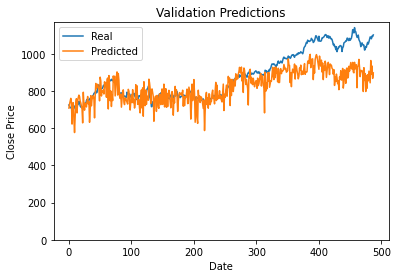


[95/100000]	Discriminator Loss: 0.9417	Generator Loss: 1.2347   	RMSE:93.6667
close | Real:0.0075 / Generated:0.0190
open | Real:0.0081 / Generated:0.0145
high | Real:0.0064 / Generated:0.0191
low | Real:0.0104 / Generated:0.0146
CUMLOGRET_1 | Real:0.0337 / Generated:0.0655
RSI_14 | Real:0.3868 / Generated:0.2907
MACD_12_26_9 | Real:0.5230 / Generated:0.5034
SMA5 | Real:0.0026 / Generated:-0.0164


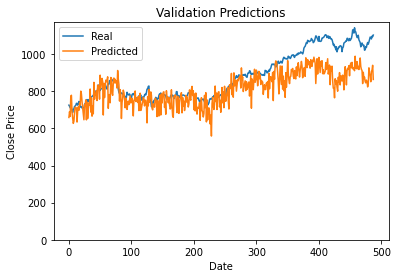


[100/100000]	Discriminator Loss: 0.9996	Generator Loss: 1.7678   	RMSE:99.0315
close | Real:0.4364 / Generated:0.4257
open | Real:0.4347 / Generated:0.3968
high | Real:0.4350 / Generated:0.4423
low | Real:0.4373 / Generated:0.3848
CUMLOGRET_1 | Real:0.7137 / Generated:0.6841
RSI_14 | Real:1.0000 / Generated:0.8611
MACD_12_26_9 | Real:0.9049 / Generated:0.7925
SMA5 | Real:0.4207 / Generated:0.4422


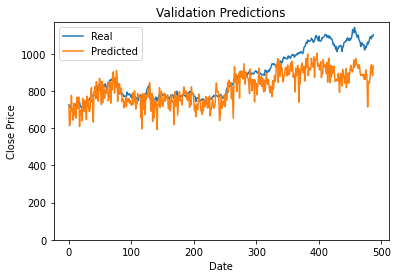


[105/100000]	Discriminator Loss: 0.9990	Generator Loss: 1.1305   	RMSE:98.1218
close | Real:0.0217 / Generated:0.0073
open | Real:0.0250 / Generated:0.0358
high | Real:0.0213 / Generated:0.0215
low | Real:0.0255 / Generated:0.0261
CUMLOGRET_1 | Real:0.0904 / Generated:0.1127
RSI_14 | Real:0.4345 / Generated:0.4862
MACD_12_26_9 | Real:0.5765 / Generated:0.6029
SMA5 | Real:0.0196 / Generated:0.0183


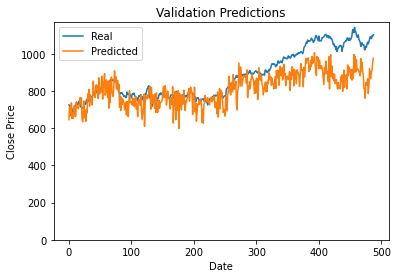


[110/100000]	Discriminator Loss: 0.9875	Generator Loss: 2.1748   	RMSE:102.0406
close | Real:0.6004 / Generated:0.6533
open | Real:0.5945 / Generated:0.6506
high | Real:0.5978 / Generated:0.6620
low | Real:0.6038 / Generated:0.6459
CUMLOGRET_1 | Real:0.8207 / Generated:0.8647
RSI_14 | Real:0.3258 / Generated:0.4864
MACD_12_26_9 | Real:0.5079 / Generated:0.5606
SMA5 | Real:0.6144 / Generated:0.6682


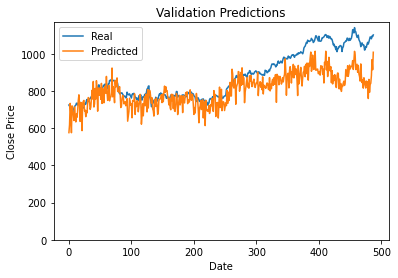


[115/100000]	Discriminator Loss: 0.9839	Generator Loss: 1.9719   	RMSE:103.3346
close | Real:0.5686 / Generated:0.5448
open | Real:0.5551 / Generated:0.5258
high | Real:0.5661 / Generated:0.5418
low | Real:0.5621 / Generated:0.5159
CUMLOGRET_1 | Real:0.8021 / Generated:0.7914
RSI_14 | Real:0.4409 / Generated:0.4923
MACD_12_26_9 | Real:0.5548 / Generated:0.5484
SMA5 | Real:0.5862 / Generated:0.5608


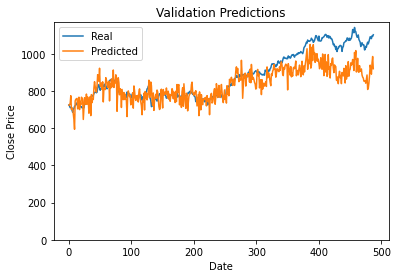


[120/100000]	Discriminator Loss: 1.0219	Generator Loss: 1.9333   	RMSE:83.9615
close | Real:0.5985 / Generated:0.6157
open | Real:0.5974 / Generated:0.5672
high | Real:0.5985 / Generated:0.6102
low | Real:0.6054 / Generated:0.5722
CUMLOGRET_1 | Real:0.8196 / Generated:0.8032
RSI_14 | Real:0.8034 / Generated:0.6877
MACD_12_26_9 | Real:0.8333 / Generated:0.7348
SMA5 | Real:0.5946 / Generated:0.6241


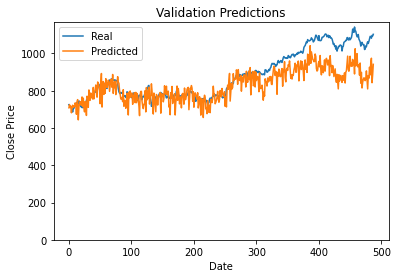


[125/100000]	Discriminator Loss: 0.9617	Generator Loss: 2.0611   	RMSE:87.2976
close | Real:0.0193 / Generated:0.0037
open | Real:0.0193 / Generated:0.0075
high | Real:0.0166 / Generated:0.0103
low | Real:0.0216 / Generated:0.0244
CUMLOGRET_1 | Real:0.0814 / Generated:0.1281
RSI_14 | Real:0.6052 / Generated:0.6381
MACD_12_26_9 | Real:0.5997 / Generated:0.6329
SMA5 | Real:0.0153 / Generated:0.0265


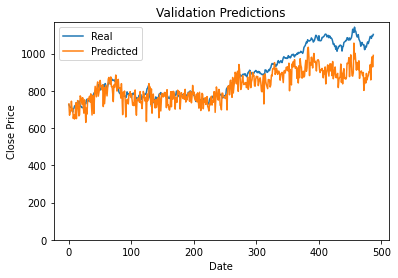


[130/100000]	Discriminator Loss: 0.9805	Generator Loss: 2.1836   	RMSE:89.5652
close | Real:0.6799 / Generated:0.6819
open | Real:0.6984 / Generated:0.6701
high | Real:0.6948 / Generated:0.6841
low | Real:0.6918 / Generated:0.6379
CUMLOGRET_1 | Real:0.8635 / Generated:0.8405
RSI_14 | Real:0.3290 / Generated:0.6601
MACD_12_26_9 | Real:0.6339 / Generated:0.7243
SMA5 | Real:0.7152 / Generated:0.6850


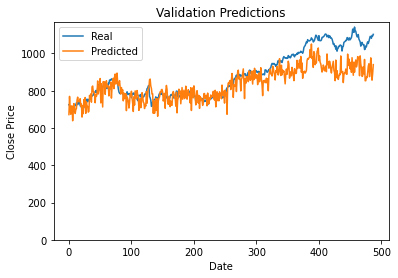


[135/100000]	Discriminator Loss: 0.7713	Generator Loss: 2.4154   	RMSE:81.6407
close | Real:0.0698 / Generated:0.0687
open | Real:0.0702 / Generated:0.0695
high | Real:0.0671 / Generated:0.0666
low | Real:0.0728 / Generated:0.0741
CUMLOGRET_1 | Real:0.2374 / Generated:0.2317
RSI_14 | Real:0.4537 / Generated:0.5076
MACD_12_26_9 | Real:0.5642 / Generated:0.6080
SMA5 | Real:0.0677 / Generated:0.0573


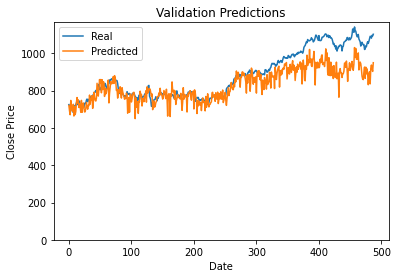


[140/100000]	Discriminator Loss: 0.7518	Generator Loss: 2.3332   	RMSE:82.2183
close | Real:0.8526 / Generated:0.8359
open | Real:0.8634 / Generated:0.8062
high | Real:0.8648 / Generated:0.7970
low | Real:0.8678 / Generated:0.8077
CUMLOGRET_1 | Real:0.9430 / Generated:0.9229
RSI_14 | Real:0.6203 / Generated:0.7176
MACD_12_26_9 | Real:0.7328 / Generated:0.8712
SMA5 | Real:0.8646 / Generated:0.8326


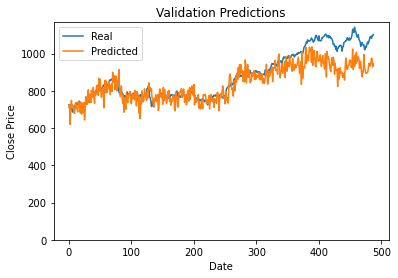


[145/100000]	Discriminator Loss: 0.6804	Generator Loss: 2.8009   	RMSE:72.3323
close | Real:0.5616 / Generated:0.5241
open | Real:0.5581 / Generated:0.4884
high | Real:0.5637 / Generated:0.5192
low | Real:0.5661 / Generated:0.5261
CUMLOGRET_1 | Real:0.7979 / Generated:0.7709
RSI_14 | Real:0.7504 / Generated:0.7008
MACD_12_26_9 | Real:0.8011 / Generated:0.7944
SMA5 | Real:0.5619 / Generated:0.5282


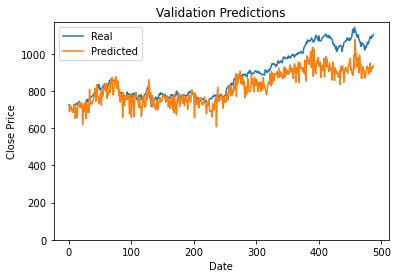


[150/100000]	Discriminator Loss: 1.0830	Generator Loss: 1.9029   	RMSE:85.7016
close | Real:0.3363 / Generated:0.3437
open | Real:0.3401 / Generated:0.3357
high | Real:0.3414 / Generated:0.3485
low | Real:0.3436 / Generated:0.3443
CUMLOGRET_1 | Real:0.6303 / Generated:0.6557
RSI_14 | Real:0.3241 / Generated:0.5462
MACD_12_26_9 | Real:0.5997 / Generated:0.6727
SMA5 | Real:0.3551 / Generated:0.3716


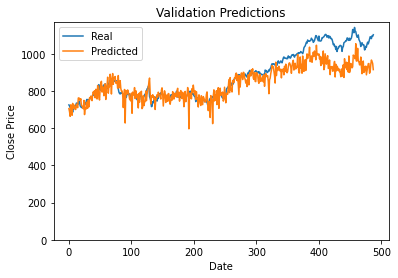


[155/100000]	Discriminator Loss: 0.9384	Generator Loss: 2.6996   	RMSE:70.3326
close | Real:0.5131 / Generated:0.5459
open | Real:0.5314 / Generated:0.5379
high | Real:0.5278 / Generated:0.5377
low | Real:0.5135 / Generated:0.5177
CUMLOGRET_1 | Real:0.7674 / Generated:0.8014
RSI_14 | Real:0.5067 / Generated:0.5901
MACD_12_26_9 | Real:0.7835 / Generated:0.7442
SMA5 | Real:0.5280 / Generated:0.5389


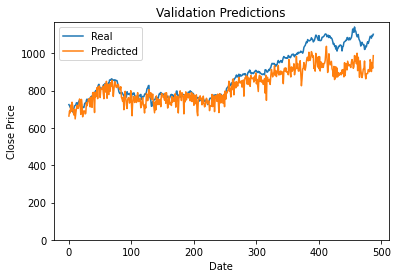


[160/100000]	Discriminator Loss: 0.8145	Generator Loss: 2.1921   	RMSE:79.1080
close | Real:0.0887 / Generated:0.0844
open | Real:0.0873 / Generated:0.1024
high | Real:0.0864 / Generated:0.0910
low | Real:0.0920 / Generated:0.0936
CUMLOGRET_1 | Real:0.2827 / Generated:0.2693
RSI_14 | Real:0.3453 / Generated:0.3231
MACD_12_26_9 | Real:0.5002 / Generated:0.4784
SMA5 | Real:0.0868 / Generated:0.0807


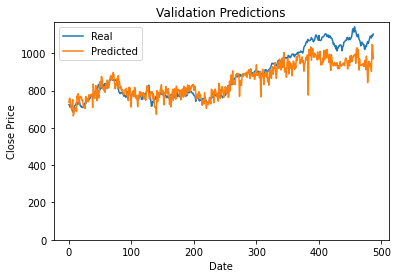


[165/100000]	Discriminator Loss: 0.8838	Generator Loss: 1.8403   	RMSE:63.3306
close | Real:0.0396 / Generated:0.0288
open | Real:0.0399 / Generated:0.0400
high | Real:0.0383 / Generated:0.0323
low | Real:0.0431 / Generated:0.0459
CUMLOGRET_1 | Real:0.1518 / Generated:0.1449
RSI_14 | Real:0.4439 / Generated:0.3323
MACD_12_26_9 | Real:0.5369 / Generated:0.5421
SMA5 | Real:0.0354 / Generated:0.0208


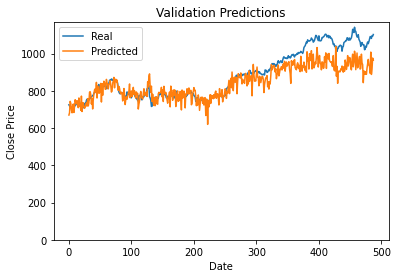


[170/100000]	Discriminator Loss: 0.9338	Generator Loss: 2.2050   	RMSE:71.0036
close | Real:0.0345 / Generated:0.0521
open | Real:0.0514 / Generated:0.0728
high | Real:0.0477 / Generated:0.0741
low | Real:0.0385 / Generated:0.0464
CUMLOGRET_1 | Real:0.1352 / Generated:0.1710
RSI_14 | Real:0.3041 / Generated:0.6161
MACD_12_26_9 | Real:0.6000 / Generated:0.6135
SMA5 | Real:0.0437 / Generated:0.0660


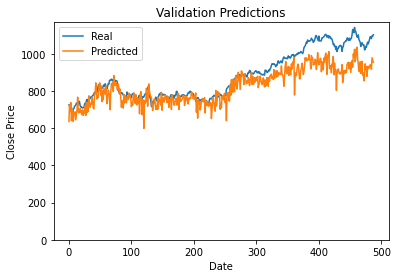


[175/100000]	Discriminator Loss: 0.9122	Generator Loss: 2.4652   	RMSE:79.0557
close | Real:0.7079 / Generated:0.6933
open | Real:0.7118 / Generated:0.6955
high | Real:0.7132 / Generated:0.6695
low | Real:0.7194 / Generated:0.6912
CUMLOGRET_1 | Real:0.8775 / Generated:0.8840
RSI_14 | Real:0.6077 / Generated:0.6256
MACD_12_26_9 | Real:0.7587 / Generated:0.7690
SMA5 | Real:0.7160 / Generated:0.6954


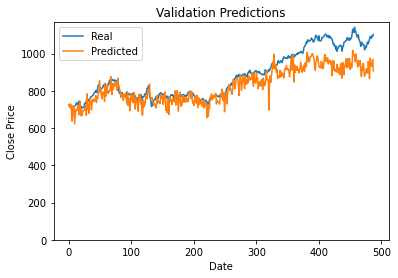


[180/100000]	Discriminator Loss: 0.8364	Generator Loss: 2.7162   	RMSE:75.1350
close | Real:0.2421 / Generated:0.2160
open | Real:0.2440 / Generated:0.1825
high | Real:0.2459 / Generated:0.2049
low | Real:0.2472 / Generated:0.1785
CUMLOGRET_1 | Real:0.5313 / Generated:0.5062
RSI_14 | Real:0.4125 / Generated:0.3518
MACD_12_26_9 | Real:0.2295 / Generated:0.2284
SMA5 | Real:0.2243 / Generated:0.2516


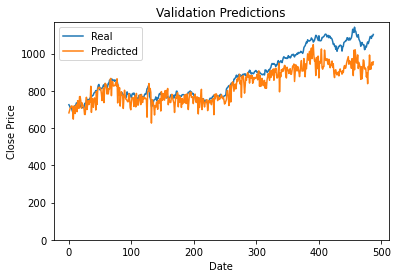


[185/100000]	Discriminator Loss: 0.9167	Generator Loss: 2.1682   	RMSE:76.3659
close | Real:0.5510 / Generated:0.6053
open | Real:0.5501 / Generated:0.6085
high | Real:0.5530 / Generated:0.5952
low | Real:0.5533 / Generated:0.5875
CUMLOGRET_1 | Real:0.7914 / Generated:0.8296
RSI_14 | Real:0.3890 / Generated:0.3315
MACD_12_26_9 | Real:0.4914 / Generated:0.5210
SMA5 | Real:0.5672 / Generated:0.6140


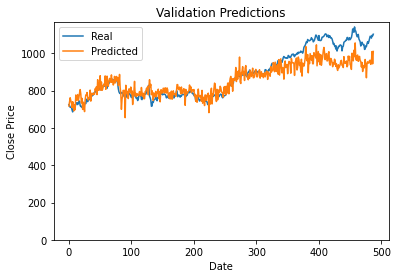


[190/100000]	Discriminator Loss: 0.9488	Generator Loss: 1.9596   	RMSE:62.2897
close | Real:0.3238 / Generated:0.3342
open | Real:0.3211 / Generated:0.3129
high | Real:0.3233 / Generated:0.3271
low | Real:0.3289 / Generated:0.3502
CUMLOGRET_1 | Real:0.6186 / Generated:0.6306
RSI_14 | Real:0.8115 / Generated:0.7770
MACD_12_26_9 | Real:0.8699 / Generated:0.7857
SMA5 | Real:0.3198 / Generated:0.3445


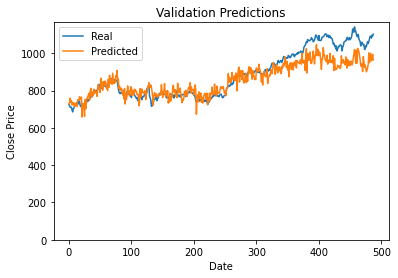


[195/100000]	Discriminator Loss: 0.8853	Generator Loss: 3.6440   	RMSE:61.0162
close | Real:0.0394 / Generated:0.0400
open | Real:0.0397 / Generated:0.0369
high | Real:0.0371 / Generated:0.0377
low | Real:0.0424 / Generated:0.0493
CUMLOGRET_1 | Real:0.1509 / Generated:0.1611
RSI_14 | Real:0.4391 / Generated:0.4418
MACD_12_26_9 | Real:0.5420 / Generated:0.5697
SMA5 | Real:0.0360 / Generated:0.0352


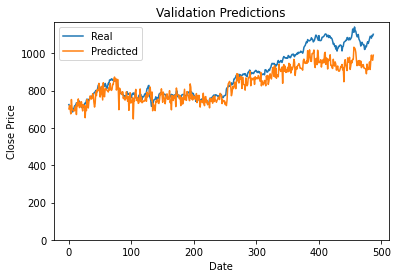


[200/100000]	Discriminator Loss: 1.1321	Generator Loss: 2.0224   	RMSE:68.3409
close | Real:0.3755 / Generated:0.3634
open | Real:0.3742 / Generated:0.3530
high | Real:0.3724 / Generated:0.3523
low | Real:0.3807 / Generated:0.3590
CUMLOGRET_1 | Real:0.6652 / Generated:0.6539
RSI_14 | Real:0.5734 / Generated:0.5922
MACD_12_26_9 | Real:0.5963 / Generated:0.5730
SMA5 | Real:0.3744 / Generated:0.3693


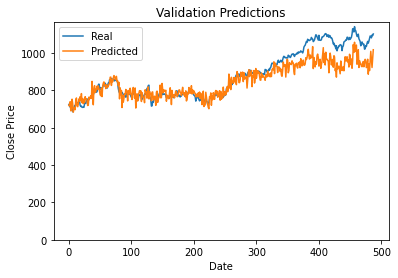


[205/100000]	Discriminator Loss: 1.0016	Generator Loss: 2.2113   	RMSE:62.5952
close | Real:0.3365 / Generated:0.3506
open | Real:0.3443 / Generated:0.3356
high | Real:0.3413 / Generated:0.3569
low | Real:0.3431 / Generated:0.3618
CUMLOGRET_1 | Real:0.6305 / Generated:0.6444
RSI_14 | Real:0.5503 / Generated:0.5851
MACD_12_26_9 | Real:0.6011 / Generated:0.6160
SMA5 | Real:0.3365 / Generated:0.3592


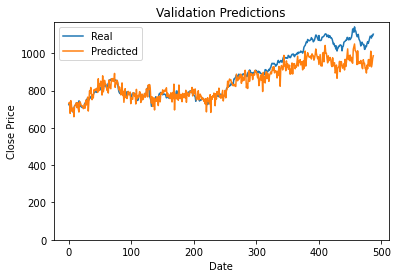


[210/100000]	Discriminator Loss: 0.9224	Generator Loss: 1.8772   	RMSE:60.6934
close | Real:0.4615 / Generated:0.4826
open | Real:0.4666 / Generated:0.4450
high | Real:0.4647 / Generated:0.4693
low | Real:0.4638 / Generated:0.4381
CUMLOGRET_1 | Real:0.7321 / Generated:0.7210
RSI_14 | Real:0.5280 / Generated:0.6230
MACD_12_26_9 | Real:0.7142 / Generated:0.7381
SMA5 | Real:0.4783 / Generated:0.4940


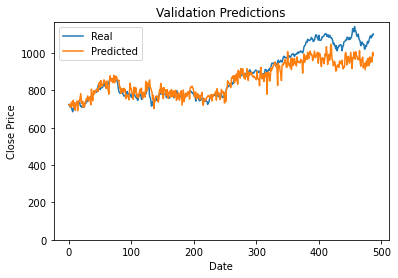


[215/100000]	Discriminator Loss: 1.0257	Generator Loss: 3.1512   	RMSE:58.0637
close | Real:0.7495 / Generated:0.6964
open | Real:0.7559 / Generated:0.6639
high | Real:0.7600 / Generated:0.6388
low | Real:0.7618 / Generated:0.6463
CUMLOGRET_1 | Real:0.8975 / Generated:0.8760
RSI_14 | Real:0.5378 / Generated:0.2660
MACD_12_26_9 | Real:0.5131 / Generated:0.4462
SMA5 | Real:0.7606 / Generated:0.6969


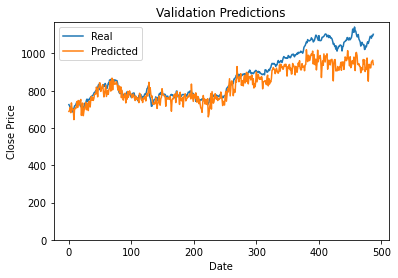


[220/100000]	Discriminator Loss: 0.8557	Generator Loss: 2.5190   	RMSE:68.2679
close | Real:0.4382 / Generated:0.3965
open | Real:0.4313 / Generated:0.3928
high | Real:0.4350 / Generated:0.3920
low | Real:0.4372 / Generated:0.4004
CUMLOGRET_1 | Real:0.7151 / Generated:0.6758
RSI_14 | Real:0.6672 / Generated:0.6789
MACD_12_26_9 | Real:0.8239 / Generated:0.7238
SMA5 | Real:0.4427 / Generated:0.3987


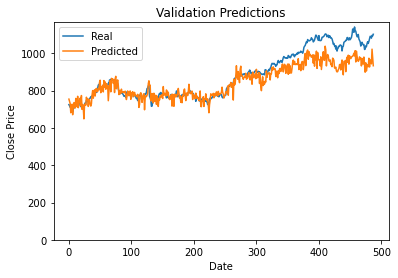


[225/100000]	Discriminator Loss: 0.9512	Generator Loss: 2.2954   	RMSE:61.3647
close | Real:0.3238 / Generated:0.3580
open | Real:0.3335 / Generated:0.3490
high | Real:0.3298 / Generated:0.3489
low | Real:0.3224 / Generated:0.3422
CUMLOGRET_1 | Real:0.6185 / Generated:0.6396
RSI_14 | Real:0.4413 / Generated:0.5010
MACD_12_26_9 | Real:0.5553 / Generated:0.5912
SMA5 | Real:0.3367 / Generated:0.3768


In [ ]:
evaluation_metrics = {"gen_loss":[], "disc_loss":[], "rmse":[]}
                      
print("Training is started")
for epoch in range(num_epochs):
    for i, sequence_batch in enumerate(train_dataloader):
            ############################
            # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
            ###########################
            ## Training with real batch
            discriminator.zero_grad()
            # Format batch
            real_sequence = sequence_batch.to(device)
            batch_size = real_sequence.size(0)
            real_labels = torch.full((batch_size,), real_label, dtype=torch.float, device=device)
            # Forward pass real batch through D
            discriminator_output_real = discriminator(real_sequence).view(-1)
            # Calculate loss on all-real batch
            discriminator_error_real = criterion(discriminator_output_real, real_labels)
            # Calculate gradients for D in backward pass
            discriminator_error_real.backward()

            ## Training with fake batch
            # Assign first t values
            generator_input_sequence = sequence_batch[:,:-1].to(device)
            #  Generate (t+1)th value from first t values
            generated_values = generator(generator_input_sequence)
            fake_labels = torch.full((batch_size,), fake_label, dtype=torch.float, device=device)
            # Concat first t real values and generated (t+1)th values
            generator_result_concat = torch.cat((generator_input_sequence, generated_values.detach()), 1)
            # Classify all fake batch with D
            discriminator_output_fake = discriminator(generator_result_concat).view(-1)
            # Calculate D's loss on the all-fake batch
            discriminator_error_fake = criterion(discriminator_output_fake, fake_labels)
            # Calculate the gradients for this batch
            discriminator_error_fake.backward()
            # Add the gradients from the all-real and all-fake batches
            discriminator_error = discriminator_error_real + discriminator_error_fake
            # Update D
            optimizer_discriminator.step()

            ############################
            # (2) Update G network: maximize log(D(G(z)))
            ###########################
            generator.zero_grad()
            real_labels = torch.full((batch_size,), real_label, dtype=torch.float, device=device)
            # Since we just updated D, perform another forward pass of all-fake batch through D
            generator_result_concat_grad = torch.cat((generator_input_sequence, generated_values), 1)
            discriminator_output_fake = discriminator(generator_result_concat_grad).view(-1)
            # Calculate G's loss based on this output
            generator_error = criterion(discriminator_output_fake, real_labels)
            # Calculate gradients for G
            generator_error.backward()
            # Update G
            optimizer_generator.step()
    if (epoch+1) % 5 == 0 or epoch+1 == 1:
        rmse = model_rmse(generator, validation_dataloader, plot_graph=True)
        evaluation_metrics["rmse"].append(rmse)
        evaluation_metrics["gen_loss"].append(generator_error.item())
        evaluation_metrics["disc_loss"].append(discriminator_error.item())
        print('\n[{}/{}]\tDiscriminator Loss: {:.4f}\tGenerator Loss: {:.4f}   \tRMSE:{:.4f}'
                  .format(epoch+1, num_epochs, discriminator_error.item(), generator_error.item(), rmse))
        for col_name, real, generated in zip(columns_used_in_training, sequence_batch[0][-1], generated_values[0][0]):
            print(f"{col_name} | Real:{real:.4f} / Generated:{generated:.4f}")
        save_path = os.path.join("./models/","model_epoch_{}.pt".format(epoch+1))
        torch.save({
            'epoch': epoch+1,
            'generator_model_state_dict': generator.state_dict(),
            'discriminator_model_state_dict': discriminator.state_dict(),
            'optimizer_generator_state_dict': optimizer_generator.state_dict(),
            'optimizer_discriminator_state_dict': optimizer_discriminator.state_dict(),
            'discriminator_loss': discriminator_error,
            'generator_loss': generator_error,
            }, save_path)